## **Task 3: Clustering Analysis (K-Means)**

**Objectives**

- Standardize the dataset
- Apply K-means clustering and determine the optimal number of clusters using elbow method
- Visualize clusters using 2D scatter plots

#### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### 2. Load the Data

In [2]:
mall_cust_df = pd.read_csv('D:\Codveda-Technologies\Level 2\Mall_Customers.csv')

mall_cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 3. Select Features

Cluster customers based on:
- Annual Income(k$)
- Spending score (1-100)

In [3]:
X = mall_cust_df[['Annual Income (k$)', 'Spending Score (1-100)']]

#### 4. Standardize Data

K-Means works best when features are on similar scales

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### 5. Elbow Method to Find Optimal k

Compute inertia (within-cluster sum of squares) for k = 1,2,3,....10

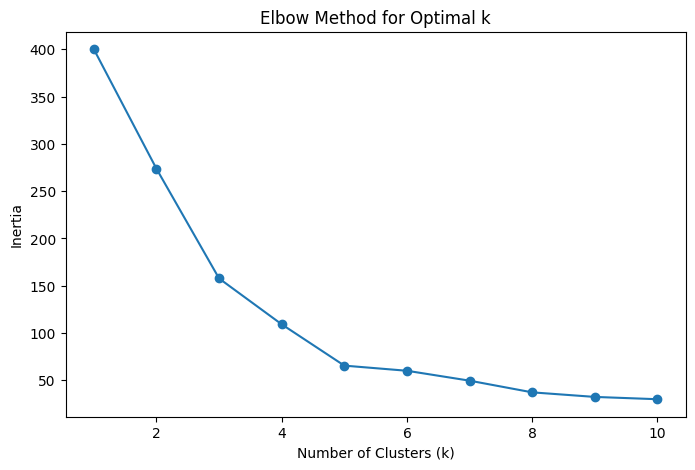

In [6]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia') 
plt.show()

**Interpretation of the Elbow Method plot and inertia values**

- The Elbow Method helps determine the optimal number of clusters (k) by plotting the inertia (within-cluster sum of squares) against different values of k.
- As k increases, inertia decreases because clusters are smaller and tighter.
- The "elbow" point on the plot is where the rate of decrease sharply slows, indicating that adding more clusters beyond this point yields diminishing returns.

In this case, examine the plot generated above. The inertia drops steeply up to k=5, then the decrease becomes more gradual.
This suggests that the optimal number of clusters is likely around k=5.

Based on the Elbow Method, the optimal number of clusters appears to be 5.

#### 6. Fit K-Means

k = 5

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

print(clusters)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Add cluster labels to dataframe

In [8]:
mall_cust_df['Cluster'] = clusters

#### 7. Visualize clusters

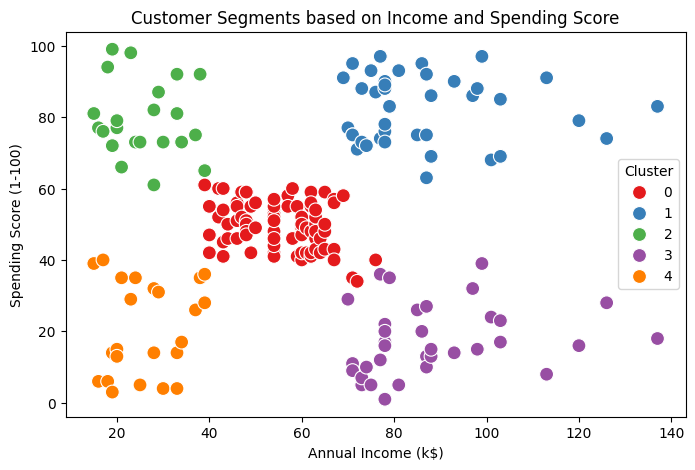

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x = 'Annual Income (k$)', 
    y = 'Spending Score (1-100)',
    hue = 'Cluster',
    data = mall_cust_df,
    palette='Set1',
    s = 100,
)
plt.title('Customer Segments based on Income and Spending Score')
plt.legend(title='Cluster')
plt.show()




**Check Cluster Centers**

To interpret clusters


In [11]:
#Unscalable cluster centers
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

print(
    pd.DataFrame(centers, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
)

   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


### **Interpretation of the Clustering Analysis**

The above analysis performs K-Means clustering on mall customer data using annual income and spending score as features. The data is first standardized to ensure both features contribute equally to the clustering process. The optimal number of clusters (k=5) is determined using the Elbow Method, where the inertia plot shows a clear "elbow" at ``k=5``.

After fitting K-Means with 5 clusters, each customer is assigned to a cluster, and these labels are added to the dataframe. The resulting scatter plot visualizes how customers are grouped based on their income and spending patterns. The cluster centers (both in scaled and original units) provide insights into the typical characteristics of each segment.

**Overall, this analysis segments customers into 5 distinct groups, which can help the business tailor marketing strategies, personalize offers, and better understand customer behaviors based on income and spending habits.**